In [2]:
from plotnine import *
from plotnine.data import mpg

In [3]:
df = mpg
df["cyl"].value_counts()

4    81
6    79
8    70
5     4
Name: cyl, dtype: int64

/tmp/ipykernel_75026/1284046790.py:3: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.


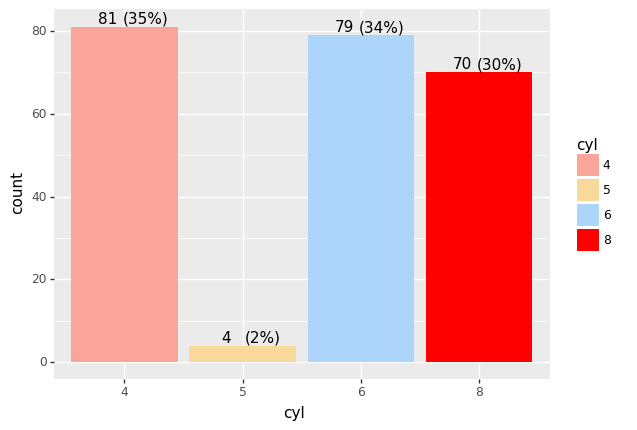

<ggplot: (8753951742410)>

In [4]:

# transforming target column into a category variable so we can plot it in the correct order: 4, 5, 6, 8 cylinders
df['cyl'] = df['cyl'].astype('category')
df['cyl'].cat.reorder_categories([4, 5, 6, 8], inplace=True)

(ggplot(df, aes('cyl', fill='cyl')) +
 geom_bar() + # plota as barras
 geom_text( # gera texto com o numero de observacoes de cada classe acima das barras
     aes(label=after_stat('count')),
     stat='count',
     nudge_x=-0.14, # posicao do texto no eixo y para nao sobrepor com a porcentagem
     nudge_y=0.125,
     va='bottom') +
 geom_text( # gera o texto com as proporcoes
     aes(label=after_stat('prop*100'), group=1),
     stat='count',
     nudge_x=0.175,# posicao do texto no eixo y para nao sobrepor com a contagem
     nudge_y=0.125,# posicao logo acima da barra
     va='bottom',
     format_string='({:.0f}%)') +
 scale_fill_manual(values=("#f9a59a", "#f9d99a", "#add5fa", "red"))
)